# Example of working with Athena project files

In [1]:
# load an Athena project file from the examples

import os
from larch.io.athena_project import read_athena

aprjfile = os.path.join("..", "pca", "cyanobacteria.prj")
aprj = read_athena(aprjfile)

In [2]:
# show the groups contained in the `_athena_groups` dictionary
aprj

Group,Flag
ozun,✔
d_2_42,✔
d_4_73,✔
d_7_03,✔
d_9_33,✔
d_20,✔
rjbc,✔
d_720,✔
hqlr,✔
Au1_Cl,✔


In [6]:
# the selection of a group can be controlled with the "Flag" attribute
aprj.d_2_42.flag = 0
aprj.d_4_73.flag = 0
aprj.d_7_03.flag = 0
aprj._athena_groups['d_9_33'].flag = 0 # accessible also as dictionary
aprj

Group,Flag
ozun,✔
d_2_42,
d_4_73,
d_7_03,
d_9_33,
d_20,✔
rjbc,✔
d_720,✔
hqlr,✔
Au1_Cl,✔


In [7]:
# show content of a single group
aprj._athena_groups['ozun']

Attribute,Type
athena_id,str
energy,ndarray
mu,ndarray
bkg_params,Group
fft_params,Group
athena_params,Group
i0,ndarray
flag,int


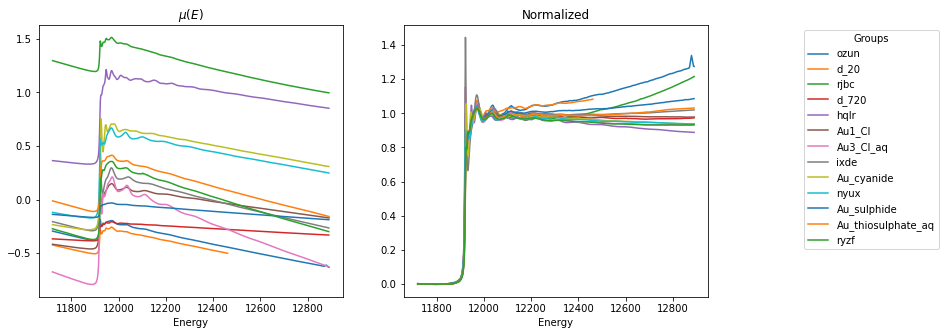

In [8]:
# example of how to iterate over the groups: normalize and plot

import matplotlib.pyplot as plt
from larch.xafs import pre_edge

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))
for name, grp in aprj._athena_groups.items():
    if grp.flag == 0:
        continue
    pre_edge(grp.energy, grp.mu, group=grp)
    ax = axs[0]
    ax.plot(grp.energy, grp.mu, label=name)
    ax.set_title(r"$\mu(E)$")
    ax.set_xlabel("Energy")
    ax = axs[1]
    ax.plot(grp.energy, grp.norm, label=name)
    ax.set_title("Normalized")
    ax.set_xlabel("Energy")
    ax.legend(title="Groups", bbox_to_anchor=(1.3, 1))